In [1]:
import pandas as pd
import numpy as np


In [2]:
installs = pd.read_csv("Archivos/installs.csv",low_memory= False);

In [3]:
clicks = pd.read_csv("Archivos/clicks.csv",low_memory= False);

In [4]:
events = pd.read_csv("Archivos/events.csv",low_memory=False);

In [5]:
auctions = pd.read_csv("Archivos/auctions.csv",low_memory= False);

In [80]:
installsDate = installs.loc[:,['created']]
clicksDate = clicks.loc[:,['created']]
eventsDate = events.loc[:,['date']]
auctionsDate = auctions.loc[:,['date']]

In [81]:
installsDate['created'] = pd.to_datetime(installsDate['created'])
clicksDate['created'] = pd.to_datetime(clicksDate['created'])
eventsDate['date'] = pd.to_datetime(eventsDate['date'])
auctionsDate['date'] = pd.to_datetime(auctionsDate['date'])

In [82]:
installsDate['hour'] = installsDate['created'].dt.hour
clicksDate['hour'] = clicksDate['created'].dt.hour
eventsDate['hour'] = eventsDate['date'].dt.hour
auctionsDate['hour'] = auctionsDate['date'].dt.hour

In [83]:
installsDate['type'] ='installs'
clicksDate['type'] = 'clicks'
eventsDate['type'] = 'events'
auctionsDate['type'] = 'actions'

In [84]:
installsDate.head()

,created,hour,type
0,2019-03-13 01:43:33.445,1,installs
1,2019-03-13 04:58:35.078,4,installs
2,2019-03-13 04:20:57.666,4,installs
3,2019-03-13 04:20:57.698,4,installs
4,2019-03-10 22:24:56.684,22,installs


In [85]:
clicksDate.head()

,created,hour,type
0,2019-03-06 22:42:12.755,22,clicks
1,2019-03-08 10:24:30.641,10,clicks
2,2019-03-08 15:24:16.069,15,clicks
3,2019-03-06 03:08:51.543,3,clicks
4,2019-03-06 03:32:55.570,3,clicks


In [86]:
eventsDate.head()

,date,hour,type
0,2019-03-05 00:09:36.966,0,events
1,2019-03-05 00:09:38.920,0,events
2,2019-03-05 00:09:26.195,0,events
3,2019-03-05 00:09:31.107,0,events
4,2019-03-09 21:00:36.585,21,events


In [87]:
auctionsDate.head()

,date,hour,type
0,2019-03-11 14:18:33.290763,14,actions
1,2019-03-11 14:18:34.440157,14,actions
2,2019-03-11 14:18:35.862360,14,actions
3,2019-03-11 14:18:36.167163,14,actions
4,2019-03-11 14:18:37.728590,14,actions


In [88]:
frames = [installsDate,clicksDate,eventsDate,auctionsDate]

result = pd.concat(frames)

/home/braianvillalba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


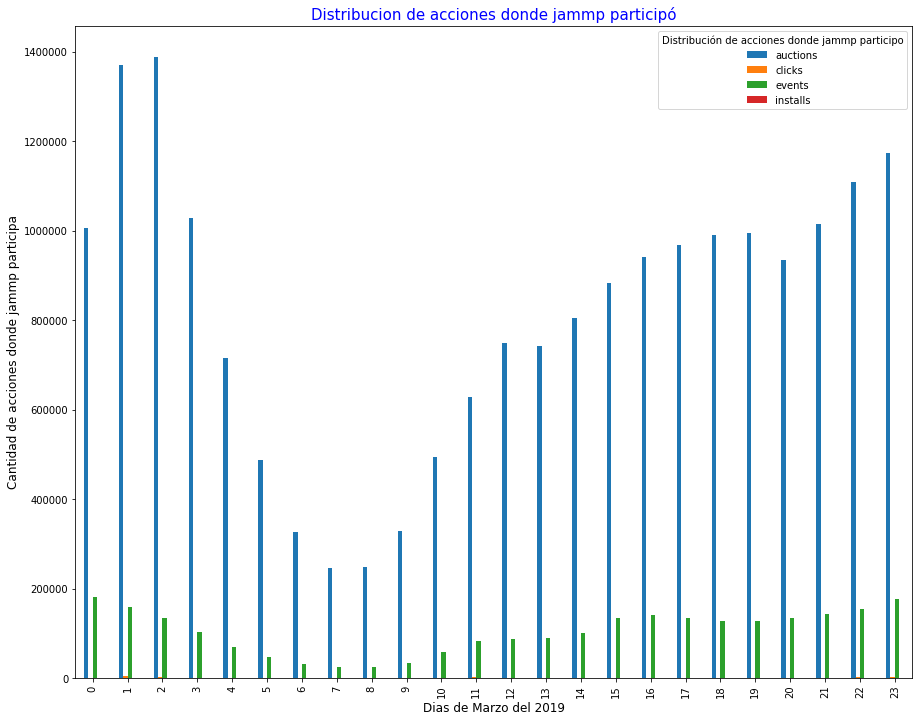

In [89]:
plot = result.groupby(['hour','type']).agg({'type':'count'}).unstack(1).plot(kind='bar',figsize = (15,12))

plot.set_title('Distribucion de acciones donde jammp participó', fontsize=15,color = 'blue')
plot.set_ylabel('Cantidad de acciones donde jammp participa',fontsize=12)
plot.set_xlabel('Dias de Marzo del 2019',fontsize=12)
plot.legend(['auctions','clicks','events','installs'],fontsize=10,title='Distribución de acciones donde jammp participo')


##### Esté gráfico muestra la gran cantidad de subastas en las cuales puede participar jammps, contrastando mucho con la cantidad de eventos que finalmente se realizan sobre jammps.
##### Algo a destacar es la poca conversion (installs) que hay sobre Jammps, como a su vez el valle d e